### Bikram Mann

### 10 June 2021

### The Wine Project

For this project, we will be using the wines dataset to find what makes the best possible wine.

https://www.kaggle.com/sgus1318/winedata

 We will be using Random Forest and Decision Tree.
 
 Here are the steps:
 
 1. I will clean the data and look for any duplicates or null values
 2. I look at the score distribution and decide what can be called a good wine vs a bad wine
 3. I create a correlation heatmap to decide which values we should pay the most attention to
 4. I will use Random Forest and Decision Tree to find the most influential factors
 5. I create a feature importance graph
 6. I will then make conclusions based on the feature importance and correlation heatmap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('wines_merged.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
# Check for nulls
df.isnull().sum().any()

False

encode

In [ ]:
# Check for duplicates:
# Columns 
print(f'Duplicated columns: {df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: True


In [ ]:
df[df.duplicated(keep=False)].head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5,red
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5,red
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5,red


In [ ]:
df['color'].value_counts(normalize=True)*100

white    75.388641
red      24.611359
Name: color, dtype: float64

In [ ]:
df['quality'].value_counts(normalize=True)*100

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

In [ ]:
# Summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


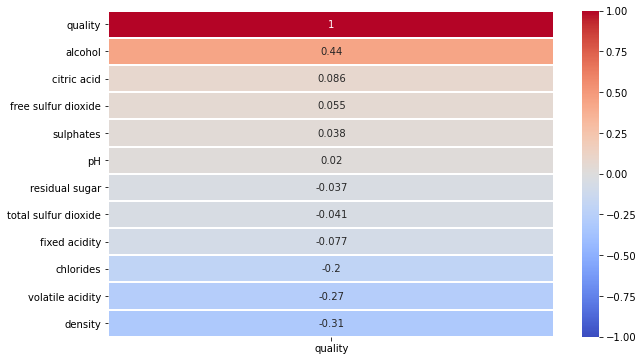

In [ ]:
# Visualising the correlations
plt.figure(figsize = (10,6))
sns.heatmap(df.corr()[['quality']].sort_values(by=['quality'], ascending = False), 
            cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True, linewidth = 1)
plt.show()

In [ ]:
# Add new binary column for color
df['red'] = np.where(df['color']=='red', 1, 0)
# Drop the sex column
df.drop(columns='color', inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


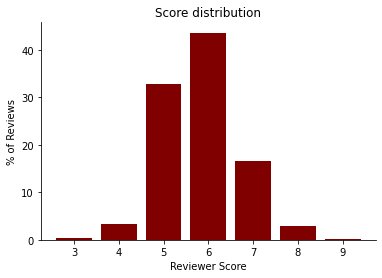

Class imbalance: [0.   0.03 0.33 0.44 0.17 0.03 0.  ]


<Figure size 432x288 with 0 Axes>

In [ ]:
values, counts = np.unique(df['quality'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100, color ='maroon')
plt.xlabel('Reviewer Score')
plt.ylabel('% of Reviews')
sns.despine()
plt.title("Score distribution")
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

plt.show()
plt.savefig('/Users/rachelchen/Desktop/myfig1')


In [ ]:
# Convert the Reviewer_Score column into a binary column
df['quality'] = np.where(df['quality']>=7, 1, 0)

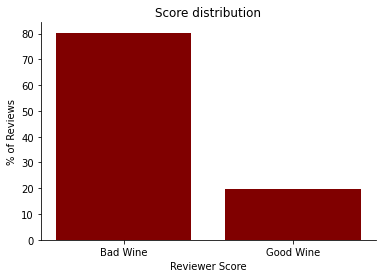

Class imbalance: [0.8 0.2]


In [ ]:
# Check again for distribution 
values, counts = np.unique(df['quality'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(['Bad Wine','Good Wine'], normalized_counts * 100, color ='maroon')
plt.xlabel('Reviewer Score')
plt.ylabel('% of Reviews')
sns.despine()
plt.title("Score distribution")
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= 'quality')
y = df['quality']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# write your code here

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 1
)

# define steps with the specified objects and parameters
estimators = [
    ('standard_scaling', StandardScaler()),
    ('pca', PCA(n_components=5, random_state=1)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
]

# create pipeline object
pipe = Pipeline(estimators)

# fit the pipeline to the untransformed training data
pipe.fit(X_train, y_train);

# accuracy scores
print(f'train accuracy: {pipe.score(X_train, y_train)*100:0.1f}%')
print(f'test accuracy: {pipe.score(X_test, y_test)*100:0.1f}%')

train accuracy: 91.0%
test accuracy: 81.6%


In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 1
)

In [ ]:
# estimators
# note that all the planned steps must be included, but the second elements in each tuple are more like placeholders
estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', LogisticRegression())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
    
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': range(5, 21),
        'model__min_samples_leaf': [2, 3, 4, 5],
        'model__random_state': [1]
    }
    
]

# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 3,
    verbose = 5,
    n_jobs = -1
)

In [ ]:
# estimators
# note that all the planned steps must be included, but the second elements in each tuple are more like placeholders
estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', LogisticRegression())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
    
    # logistic regression with L1 regularization
    {
        'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [6, 7, 8, 9, 10],
        'model': [LogisticRegression()],
        'model__penalty': ['l1'],
        'model__solver': ['liblinear'],
        'model__C': np.logspace(-3, 3, 7),
        'model__random_state': [1]
    },
    
    # logistic regression with L2 penalty
    {
        'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [6, 7, 8, 9, 10],
        'model': [LogisticRegression()],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__C': np.logspace(-3, 3, 7),
        'model__random_state': [1]
    },
    
    # decision tree classifier
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': range(5, 21),
        'model__min_samples_leaf': [2, 3, 4, 5],
        'model__random_state': [1]
    }
]

# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 3,
    verbose = 5,
    n_jobs = -1
)

In [ ]:
# fit the grid to the unprocessed training data
grid.fit(X_train, y_train)

Fitting 3 folds for each of 204 candidates, totalling 612 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(C=0.1, penalty='l1',
                                                       random_state=1,
                                                       solver='liblinear')],
                          'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'model__penalty': ['l1'], 'model__random_state': [1...
                          'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'model__penalty': ['l2'], 'model__random_state': [1],
                          'model__solver': ['lbfgs'], 'reduce_dim': [PCA()],
                          'reduce_dim__n_components': [6, 7, 8, 9, 10],
           

In [ ]:
# check the most optimal model
grid.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', PCA(n_components=6)),
                ('model',
                 LogisticRegression(C=0.1, penalty='l1', random_state=1,
                                    solver='liblinear'))])

In [ ]:
# accuracy scores
print(f'train accuracy: {grid.score(X_train, y_train)*100:0.1f}%')
print(f'test accuracy: {grid.score(X_test, y_test)*100:0.1f}%')

train accuracy: 82.2%
test accuracy: 81.8%


### End

In [ ]:
X = df.drop(columns= 'quality')
y = df['quality']

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    stratify = y,
    random_state = 1
)

In [ ]:
# # Transform data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1044
           1       0.54      0.31      0.40       256

    accuracy                           0.81      1300
   macro avg       0.70      0.62      0.64      1300
weighted avg       0.79      0.81      0.79      1300



<AxesSubplot:>

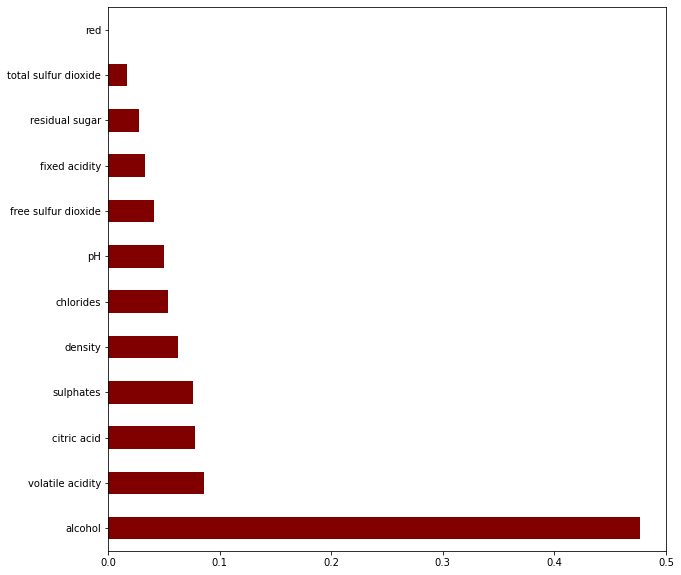

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 3, random_state = 1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10), color ='maroon')

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1044
           1       0.79      0.59      0.68       256

    accuracy                           0.89      1300
   macro avg       0.85      0.78      0.80      1300
weighted avg       0.88      0.89      0.88      1300



<AxesSubplot:>

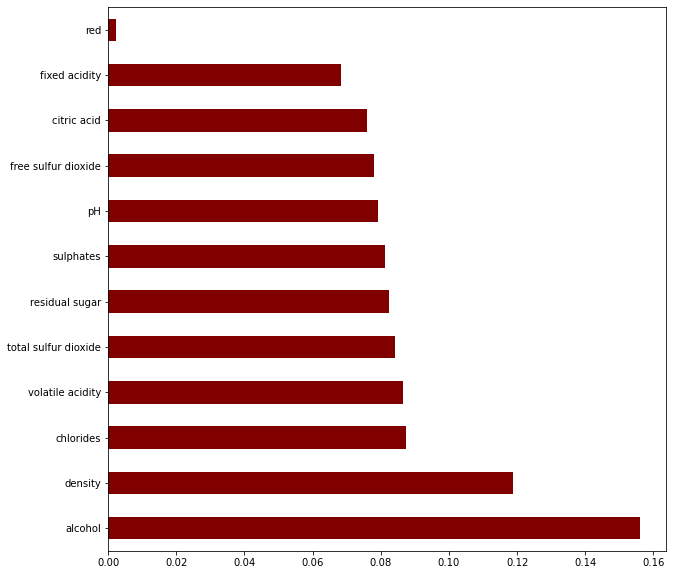

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

feat_importances = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10), color ='maroon')

In [ ]:
# accuracy scores
print(f'train accuracy: {model2.score(X_train, y_train)*100:0.1f}%')
print(f'test accuracy: {model2.score(X_test, y_test)*100:0.1f}%')

train accuracy: 100.0%
test accuracy: 88.8%


In [ ]:
model2.score(X_train, y_train)

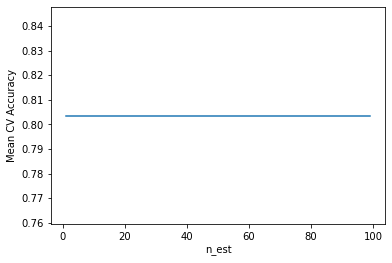

Max CV score : 0.8035405715554897
Best n_est: 1


In [ ]:
# Play around with n_estimators
from sklearn.model_selection import cross_val_score

n_est_range = list(range(1, 100))
cv_scores_rf = []

for n in n_est_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=1)

    cv_scores = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
    cv_scores_rf.append(cv_scores)
    
plt.figure()
plt.plot(n_est_range, cv_scores_rf)
plt.xlabel('n_est')
plt.ylabel('Mean CV Accuracy')

plt.show()

print(f'Max CV score : {np.max(cv_scores_rf)}')
print(f'Best n_est: {n_est_range[np.argmax(cv_scores_rf)]}')

### CONCLUSIONS

Based on the feature importance data and our correlation heatmap, we can conclude that the perfect wine must have these features:

1. High Alcohol
2. Low Density
3. Low Chlorides
4. Low Volatile Acidity
5. Low Total Sulfur Dioxide